# Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras import backend as K

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local

import McNeuron
import morphology_generator as models
import train_one_by_one_morphology as train
import batch_utils
import data_transforms

Using Theano backend.


# Load Data

In [2]:
training_data = pickle.load(open("/Volumes/Arch/Dropbox/HG-GAN/03-Data/synthetic_Two_segment_model_Different_directions_Parent_distance_n20_parent_id.p", "rb"))
#training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/train4.p", "rb"))

# Global parameters¶

In [3]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 32
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005
train_loss = 'wasserstein_loss'

rule = 'm'
train_one_by_one = False
weight_constraint = [-0.05, 0.05]

# Run

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 19, 20)        0                                            
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 19, 50)        14200       input_1[0][0]                    
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 1, 950)        0           lstm_1[0][0]                     
____________________________________________________________________________________________________
embedding (Dense)                (None, 1, 100)        95100       reshape_1[0][0]                  
___________________________________________________________________________________________

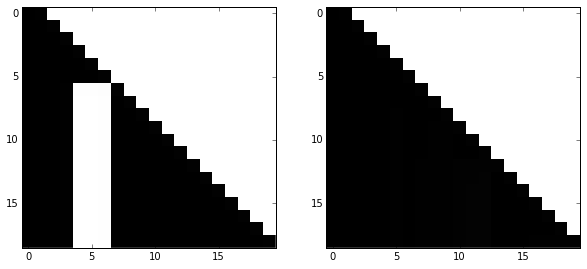

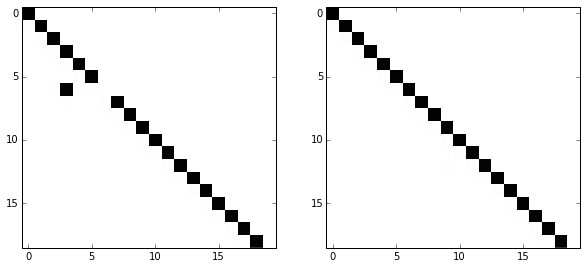

    After 20 iterations
        Discriminator Loss                     = -3052.70166016

    Generator_Loss: -4214.93652344
51
    After 20 iterations
        Discriminator Loss                     = -3967.09887695

    Generator_Loss: 1865.81140137
52
    After 20 iterations
        Discriminator Loss                     = -3815.94287109

    Generator_Loss: -4811.34716797
53
    After 20 iterations
        Discriminator Loss                     = -4801.12255859

    Generator_Loss: -4664.37646484
54
    After 20 iterations
        Discriminator Loss                     = -4928.55859375

    Generator_Loss: -5265.59033203
55
    After 20 iterations
        Discriminator Loss                     = -3656.37255859

    Generator_Loss: 9536.13183594
56
    After 20 iterations
        Discriminator Loss                     = -4948.10253906

    Generator_Loss: 7015.95068359
57
    After 20 iterations
        Discriminator Loss                     = -5320.56591797

    Generator_Loss: 6060.

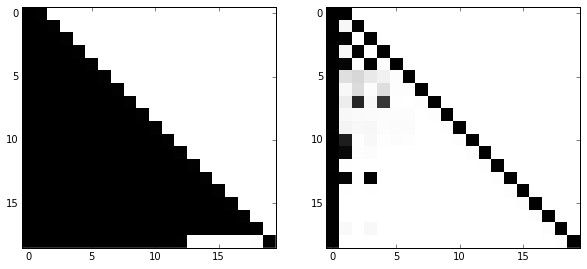

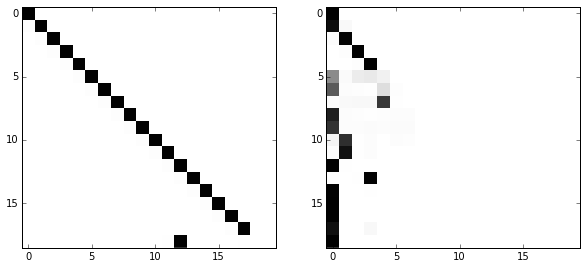

    After 20 iterations
        Discriminator Loss                     = -4520.55957031

    Generator_Loss: 9116.72558594
76
    After 20 iterations
        Discriminator Loss                     = -6571.66357422

    Generator_Loss: 6647.03759766
77
    After 20 iterations
        Discriminator Loss                     = -7178.015625

    Generator_Loss: 6773.55908203
78
    After 20 iterations
        Discriminator Loss                     = -5864.77929688

    Generator_Loss: 4558.74902344
79
    After 20 iterations
        Discriminator Loss                     = -4371.24169922

    Generator_Loss: 11469.9472656
80
    After 20 iterations
        Discriminator Loss                     = -2305.97094727

    Generator_Loss: 15596.5527344
81
    After 20 iterations
        Discriminator Loss                     = -2682.28222656

    Generator_Loss: 12661.6513672
82
    After 20 iterations
        Discriminator Loss                     = -4408.99023438

    Generator_Loss: 13648.11914

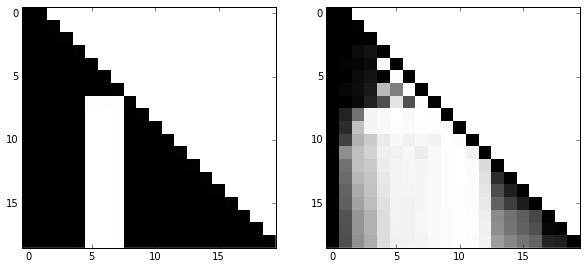

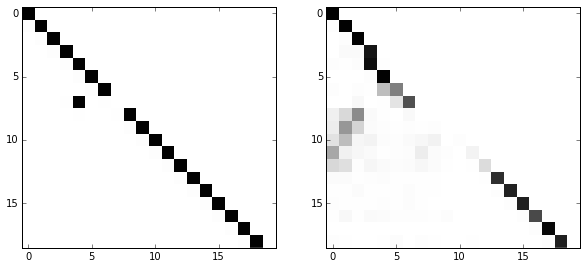

    After 20 iterations
        Discriminator Loss                     = -845.170715332

    Generator_Loss: 17454.2910156
101
    After 20 iterations
        Discriminator Loss                     = -2756.9519043

    Generator_Loss: 16733.9335938
102
    After 20 iterations
        Discriminator Loss                     = -3664.81079102

    Generator_Loss: 13349.0
103
    After 20 iterations
        Discriminator Loss                     = -3965.38452148

    Generator_Loss: 8193.41699219
104
    After 20 iterations
        Discriminator Loss                     = -6033.55957031

    Generator_Loss: 9821.72167969
105
    After 20 iterations
        Discriminator Loss                     = -6042.04931641

    Generator_Loss: 8801.96484375
106
    After 20 iterations
        Discriminator Loss                     = -6961.49707031

    Generator_Loss: 11743.2734375
107
    After 20 iterations
        Discriminator Loss                     = -5824.11621094

    Generator_Loss: 11498.305

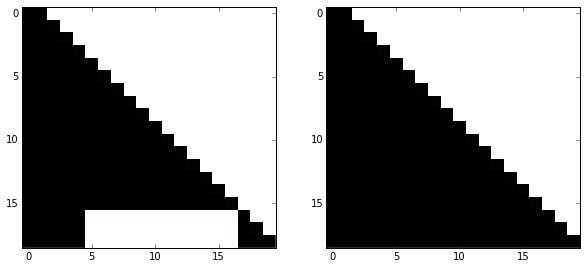

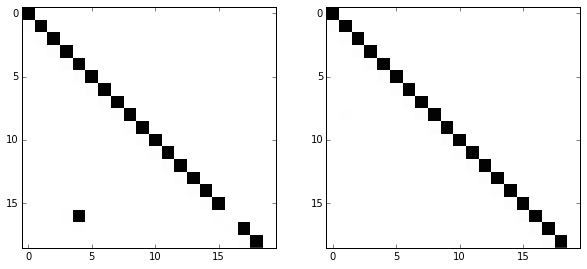

    After 20 iterations
        Discriminator Loss                     = -6302.33300781

    Generator_Loss: 6932.5390625
126
    After 20 iterations
        Discriminator Loss                     = -6345.16796875

    Generator_Loss: 9867.03710938
127
    After 20 iterations
        Discriminator Loss                     = -6345.19824219

    Generator_Loss: 11088.0722656
128
    After 20 iterations
        Discriminator Loss                     = -7369.359375

    Generator_Loss: 9889.19042969
129
    After 20 iterations
        Discriminator Loss                     = -5408.45166016

    Generator_Loss: 11767.1064453
130
    After 20 iterations
        Discriminator Loss                     = -7867.62207031

    Generator_Loss: 7185.80615234
131
    After 20 iterations
        Discriminator Loss                     = -7490.171875

    Generator_Loss: 9520.95703125
132
    After 20 iterations
        Discriminator Loss                     = -9378.79296875

    Generator_Loss: 11401.8

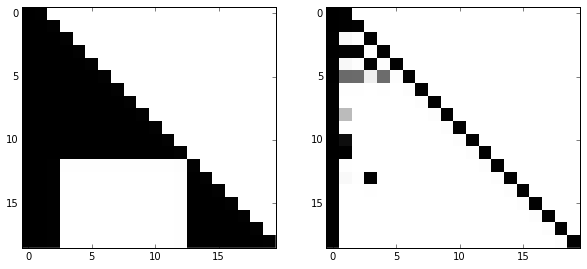

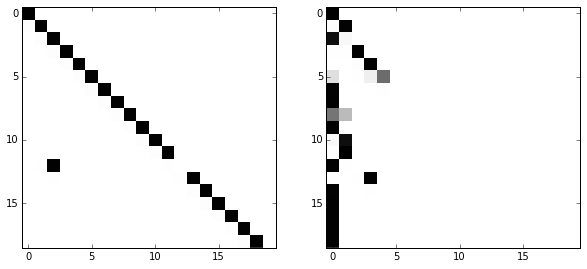

    After 20 iterations
        Discriminator Loss                     = -4111.14404297

    Generator_Loss: 509.440124512
151
    After 20 iterations
        Discriminator Loss                     = -8712.05566406

    Generator_Loss: -3117.1159668
152
    After 20 iterations
        Discriminator Loss                     = -5234.60253906

    Generator_Loss: -823.056335449
153
    After 20 iterations
        Discriminator Loss                     = -6022.40136719

    Generator_Loss: -9566.20117188
154
    After 20 iterations
        Discriminator Loss                     = -5546.10986328

    Generator_Loss: -8015.0390625
155
    After 20 iterations
        Discriminator Loss                     = -9306.7265625

    Generator_Loss: 11663.8632812
156
    After 20 iterations
        Discriminator Loss                     = -414.717346191

    Generator_Loss: 21865.5761719
157
    After 20 iterations
        Discriminator Loss                     = -426.412902832

    Generator_Loss: 2

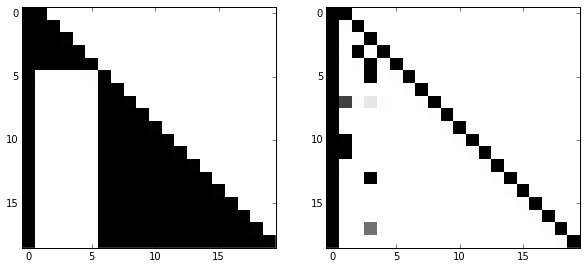

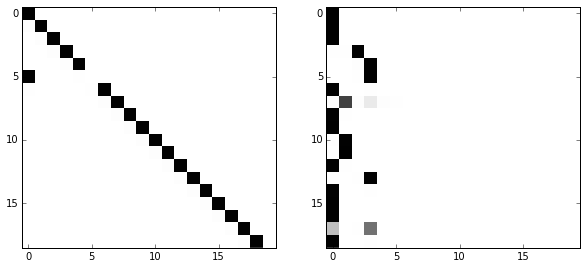

    After 20 iterations
        Discriminator Loss                     = -9299.71777344

    Generator_Loss: 15006.1259766
176
    After 20 iterations
        Discriminator Loss                     = -9315.72949219

    Generator_Loss: 11066.21875
177
    After 20 iterations
        Discriminator Loss                     = -6687.37890625

    Generator_Loss: 14825.8632812
178
    After 20 iterations
        Discriminator Loss                     = -8435.40136719

    Generator_Loss: 10194.0341797
179
    After 20 iterations
        Discriminator Loss                     = -9967.62792969

    Generator_Loss: 10737.7568359
180
    After 20 iterations
        Discriminator Loss                     = -8414.28515625

    Generator_Loss: 10667.3847656
181
    After 20 iterations
        Discriminator Loss                     = -7453.83837891

    Generator_Loss: 11515.765625
182
    After 20 iterations
        Discriminator Loss                     = -9498.91992188

    Generator_Loss: 11567

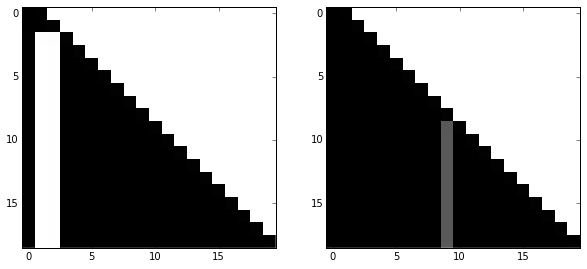

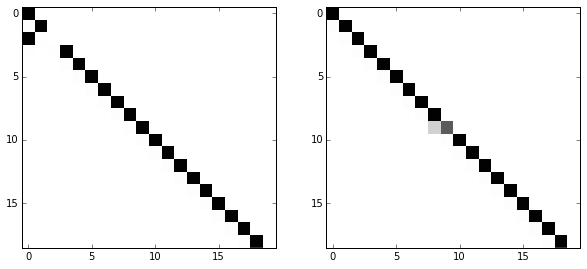

    After 20 iterations
        Discriminator Loss                     = -6268.90673828

    Generator_Loss: -8758.62109375
201
    After 20 iterations
        Discriminator Loss                     = -8724.30566406

    Generator_Loss: 14158.9482422
202
    After 20 iterations
        Discriminator Loss                     = -5168.45654297

    Generator_Loss: -8563.91015625
203
    After 20 iterations
        Discriminator Loss                     = -6904.87890625

    Generator_Loss: -8689.40625
204
    After 20 iterations
        Discriminator Loss                     = -6788.35595703

    Generator_Loss: -7007.08886719
205
    After 20 iterations
        Discriminator Loss                     = -7737.546875

    Generator_Loss: -801.47064209
206
    After 20 iterations
        Discriminator Loss                     = -4205.46679688

    Generator_Loss: -10851.7050781
207
    After 20 iterations
        Discriminator Loss                     = -5697.58056641

    Generator_Loss: 22

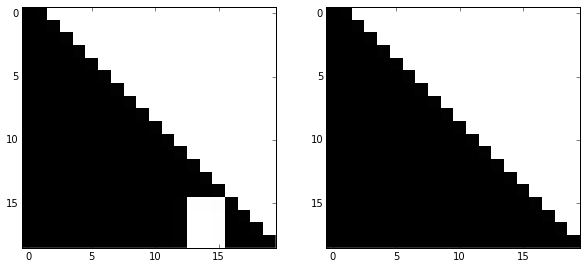

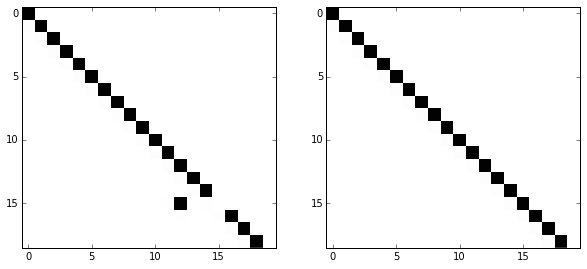

    After 20 iterations
        Discriminator Loss                     = -11278.4912109

    Generator_Loss: 12557.8632812
226
    After 20 iterations
        Discriminator Loss                     = -10790.2080078

    Generator_Loss: 15782.6181641
227
    After 20 iterations
        Discriminator Loss                     = -10420.0839844

    Generator_Loss: 13588.6259766
228
    After 20 iterations
        Discriminator Loss                     = -9016.81835938

    Generator_Loss: 12816.5927734
229
    After 20 iterations
        Discriminator Loss                     = -10241.5625

    Generator_Loss: 16254.7763672
230
    After 20 iterations
        Discriminator Loss                     = -11315.3017578

    Generator_Loss: 16990.9101562
231
    After 20 iterations
        Discriminator Loss                     = -12118.625

    Generator_Loss: 13468.3583984
232
    After 20 iterations
        Discriminator Loss                     = -10452.0087891

    Generator_Loss: 13288.591

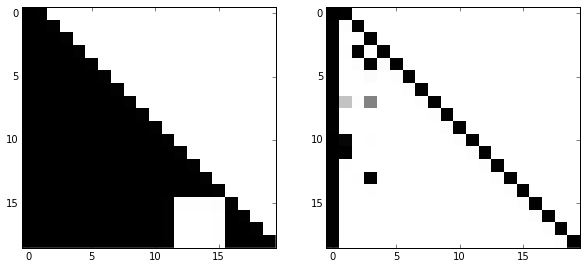

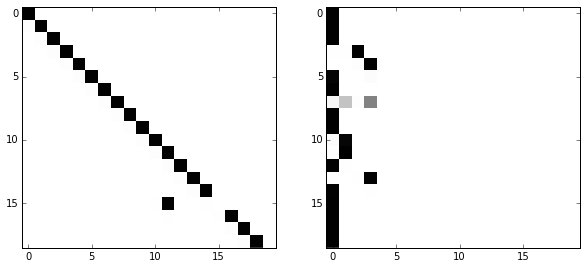

    After 20 iterations
        Discriminator Loss                     = -12566.5751953

    Generator_Loss: 16094.8154297
251
    After 20 iterations
        Discriminator Loss                     = -11376.3056641

    Generator_Loss: 12991.4804688
252
    After 20 iterations
        Discriminator Loss                     = -10443.3613281

    Generator_Loss: 15747.9140625
253
    After 20 iterations
        Discriminator Loss                     = -14413.6640625

    Generator_Loss: 12723.9267578
254
    After 20 iterations
        Discriminator Loss                     = -11879.7236328

    Generator_Loss: 17473.3730469
255
    After 20 iterations
        Discriminator Loss                     = -11825.7451172

    Generator_Loss: 14826.0390625
256
    After 20 iterations
        Discriminator Loss                     = -14263.0791016

    Generator_Loss: 12540.5693359
257
    After 20 iterations
        Discriminator Loss                     = -12288.0751953

    Generator_Loss: 14

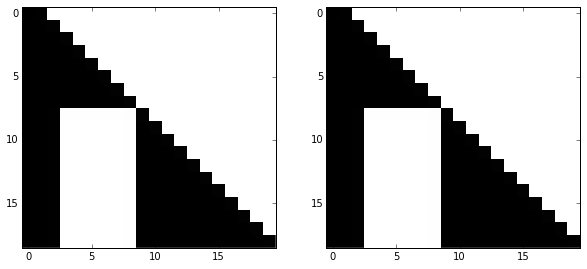

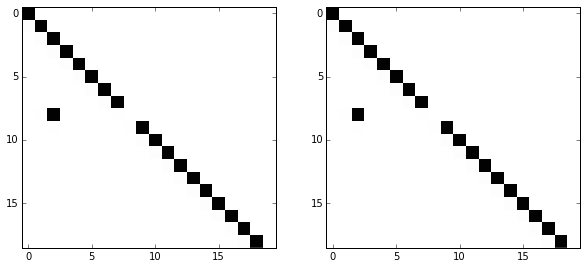

    After 20 iterations
        Discriminator Loss                     = -9942.60742188

    Generator_Loss: 14731.2744141
276
    After 20 iterations
        Discriminator Loss                     = -12710.5625

    Generator_Loss: 13885.7333984
277
    After 20 iterations
        Discriminator Loss                     = -10361.7001953

    Generator_Loss: 17021.1738281
278
    After 20 iterations
        Discriminator Loss                     = -12019.6923828

    Generator_Loss: 16989.8378906
279
    After 20 iterations
        Discriminator Loss                     = -10046.1582031

    Generator_Loss: 15168.8359375
280
    After 20 iterations
        Discriminator Loss                     = -10705.5917969

    Generator_Loss: 13984.3808594
281
    After 20 iterations
        Discriminator Loss                     = -9806.78808594

    Generator_Loss: 12570.0869141
282
    After 20 iterations
        Discriminator Loss                     = -9695.64355469

    Generator_Loss: 11628

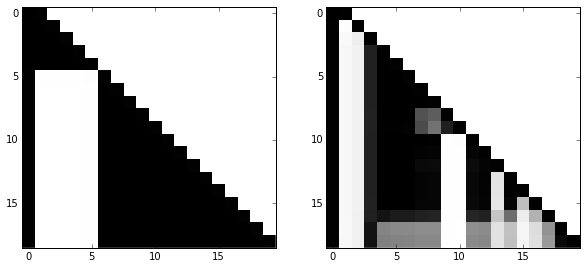

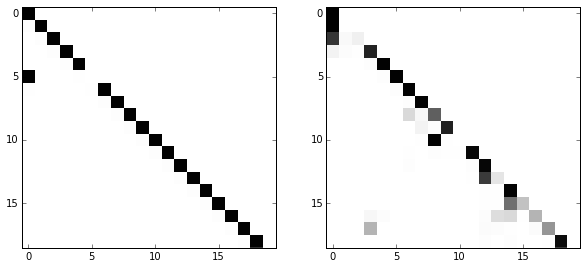

    After 20 iterations
        Discriminator Loss                     = -14788.8984375

    Generator_Loss: 14176.4248047
301
    After 20 iterations
        Discriminator Loss                     = -12194.3134766

    Generator_Loss: 14811.0166016
302
    After 20 iterations
        Discriminator Loss                     = -14281.6767578

    Generator_Loss: 16556.9726562
303
    After 20 iterations
        Discriminator Loss                     = -12777.4140625

    Generator_Loss: 20017.5566406
304
    After 20 iterations
        Discriminator Loss                     = -10426.2431641

    Generator_Loss: 15964.2216797
305
    After 20 iterations
        Discriminator Loss                     = -12458.4091797

    Generator_Loss: 16547.3554688
306
    After 20 iterations
        Discriminator Loss                     = -12766.4414062

    Generator_Loss: 15436.9863281
307
    After 20 iterations
        Discriminator Loss                     = -14150.4755859

    Generator_Loss: 17

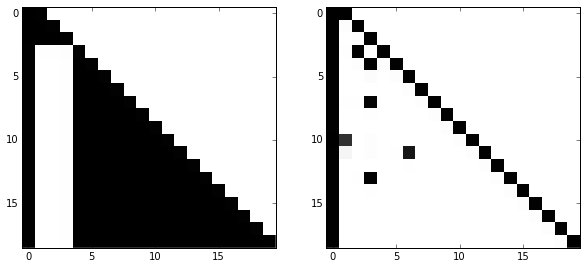

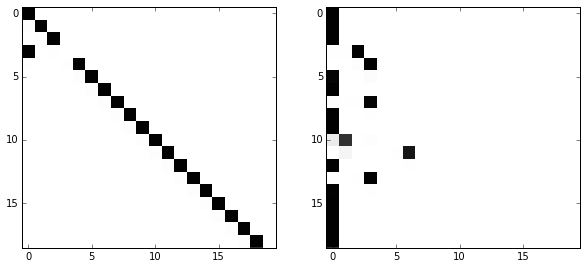

    After 20 iterations
        Discriminator Loss                     = -11937.5009766

    Generator_Loss: 18794.5058594
326
    After 20 iterations
        Discriminator Loss                     = -9829.5546875

    Generator_Loss: 16217.3818359
327
    After 20 iterations
        Discriminator Loss                     = -12317.2314453

    Generator_Loss: 13445.9326172
328
    After 20 iterations
        Discriminator Loss                     = -13690.1210938

    Generator_Loss: 17901.2890625
329
    After 20 iterations
        Discriminator Loss                     = -13964.5361328

    Generator_Loss: 18134.8242188
330
    After 20 iterations
        Discriminator Loss                     = -11329.9404297

    Generator_Loss: 17444.5546875
331
    After 20 iterations
        Discriminator Loss                     = -8984.68164062

    Generator_Loss: 18284.6992188
332
    After 20 iterations
        Discriminator Loss                     = -9353.17089844

    Generator_Loss: -42

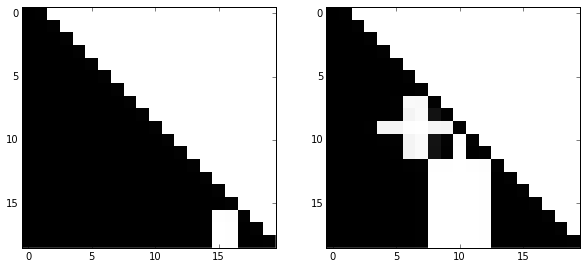

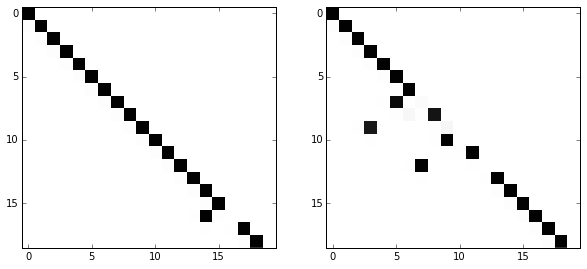

    After 20 iterations
        Discriminator Loss                     = -12295.4589844

    Generator_Loss: 19589.8203125
351
    After 20 iterations
        Discriminator Loss                     = -12786.8925781

    Generator_Loss: 13743.4511719
352
    After 20 iterations
        Discriminator Loss                     = -16367.6396484

    Generator_Loss: 19713.0625
353
    After 20 iterations
        Discriminator Loss                     = -11125.3486328

    Generator_Loss: 18080.9394531
354
    After 20 iterations
        Discriminator Loss                     = -11179.7626953

    Generator_Loss: 21612.6777344
355
    After 20 iterations
        Discriminator Loss                     = -11974.4101562

    Generator_Loss: 18668.5390625
356
    After 20 iterations
        Discriminator Loss                     = -10997.8691406

    Generator_Loss: 19810.9042969
357
    After 20 iterations
        Discriminator Loss                     = -13972.9316406

    Generator_Loss: 16651

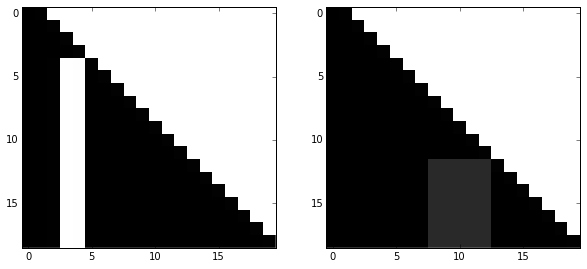

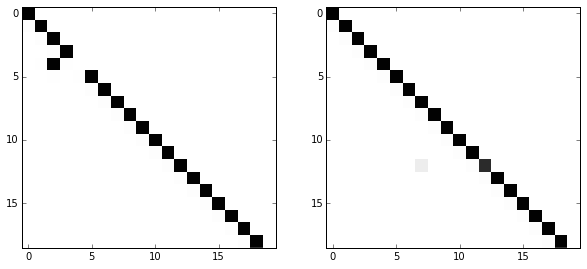

    After 20 iterations
        Discriminator Loss                     = -15537.8837891

    Generator_Loss: 18862.5820312
376
    After 20 iterations
        Discriminator Loss                     = -14550.8554688

    Generator_Loss: 16163.6357422
377
    After 20 iterations
        Discriminator Loss                     = -12363.7900391

    Generator_Loss: 20449.71875
378
    After 20 iterations
        Discriminator Loss                     = -14745.5947266

    Generator_Loss: 12498.4501953
379
    After 20 iterations
        Discriminator Loss                     = -12494.7958984

    Generator_Loss: 13957.625
380
    After 20 iterations
        Discriminator Loss                     = -11522.9179688

    Generator_Loss: 16538.8632812
381
    After 20 iterations
        Discriminator Loss                     = -14011.2294922

    Generator_Loss: 20398.375
382
    After 20 iterations
        Discriminator Loss                     = -13863.2011719

    Generator_Loss: 18255.662109

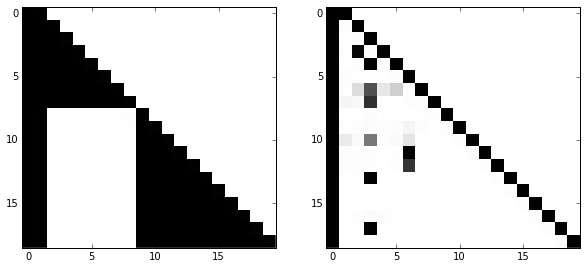

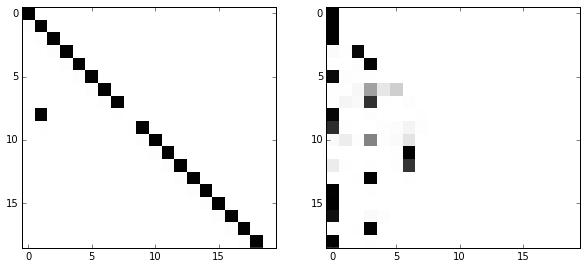

    After 20 iterations
        Discriminator Loss                     = -14511.2001953

    Generator_Loss: 14893.3271484
401
    After 20 iterations
        Discriminator Loss                     = -14571.0283203

    Generator_Loss: 17057.4316406
402
    After 20 iterations
        Discriminator Loss                     = -13759.8193359

    Generator_Loss: 17250.609375
403
    After 20 iterations
        Discriminator Loss                     = -14016.0595703

    Generator_Loss: 17879.8613281
404
    After 20 iterations
        Discriminator Loss                     = -14043.6328125

    Generator_Loss: 15737.5957031
405
    After 20 iterations
        Discriminator Loss                     = -16498.359375

    Generator_Loss: 14854.7197266
406
    After 20 iterations
        Discriminator Loss                     = -13394.8896484

    Generator_Loss: 18963.7851562
407
    After 20 iterations
        Discriminator Loss                     = -12642.9541016

    Generator_Loss: 1883

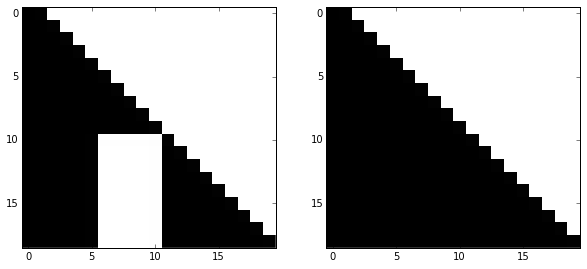

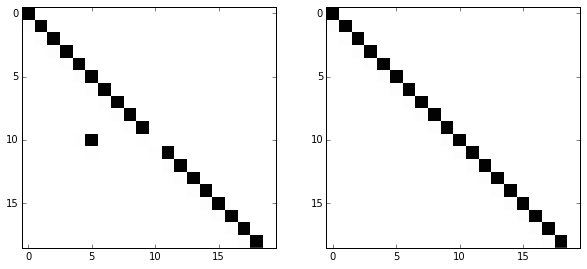

    After 20 iterations
        Discriminator Loss                     = -14556.5087891

    Generator_Loss: 12841.6005859
426
    After 20 iterations
        Discriminator Loss                     = -15596.7050781

    Generator_Loss: 13838.9912109
427
    After 20 iterations
        Discriminator Loss                     = -14768.3125

    Generator_Loss: 17652.3027344
428
    After 20 iterations
        Discriminator Loss                     = -10204.296875

    Generator_Loss: 19955.9589844
429
    After 20 iterations
        Discriminator Loss                     = -13753.8300781

    Generator_Loss: 12640.0107422
430
    After 20 iterations
        Discriminator Loss                     = -14547.4980469

    Generator_Loss: 20830.1210938
431
    After 20 iterations
        Discriminator Loss                     = -15373.3710938

    Generator_Loss: 15556.7236328
432
    After 20 iterations
        Discriminator Loss                     = -16151.1738281

    Generator_Loss: 15202.

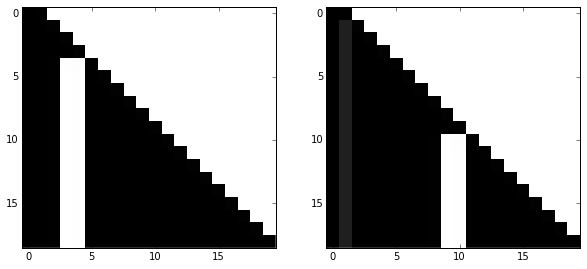

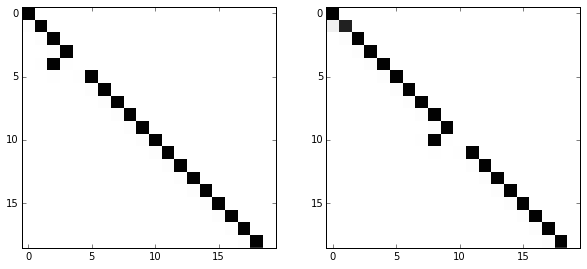

    After 20 iterations
        Discriminator Loss                     = -13948.3447266

    Generator_Loss: 19425.1523438
451
    After 20 iterations
        Discriminator Loss                     = -13811.0

    Generator_Loss: 13350.5888672
452
    After 20 iterations
        Discriminator Loss                     = -16566.7148438

    Generator_Loss: 23317.84375
453
    After 20 iterations
        Discriminator Loss                     = -13624.7646484

    Generator_Loss: 18768.4628906
454
    After 20 iterations
        Discriminator Loss                     = -14317.9013672

    Generator_Loss: 18128.0546875
455
    After 20 iterations
        Discriminator Loss                     = -16795.4648438

    Generator_Loss: 25568.6894531
456
    After 20 iterations
        Discriminator Loss                     = -17256.1835938

    Generator_Loss: 20816.0195312
457
    After 20 iterations
        Discriminator Loss                     = -16981.4785156

    Generator_Loss: 23445.3437

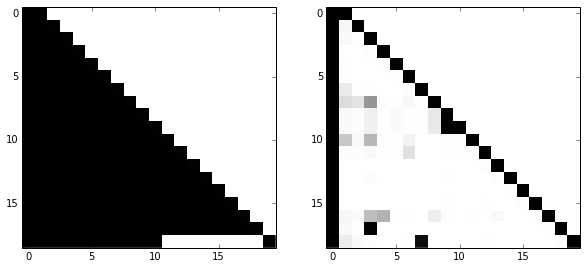

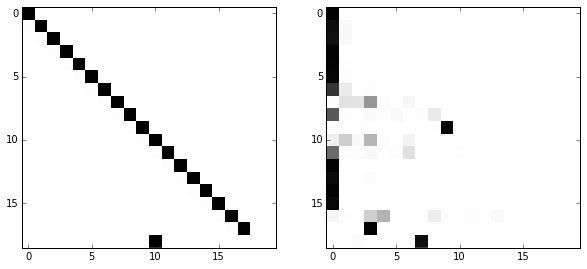

    After 20 iterations
        Discriminator Loss                     = -18438.1601562

    Generator_Loss: 19615.5917969
476
    After 20 iterations
        Discriminator Loss                     = -15548.7255859

    Generator_Loss: 19817.2695312
477
    After 20 iterations
        Discriminator Loss                     = -17179.40625

    Generator_Loss: 11008.3359375
478
    After 20 iterations
        Discriminator Loss                     = -15069.1064453

    Generator_Loss: 12820.3330078
479
    After 20 iterations
        Discriminator Loss                     = -20870.6894531

    Generator_Loss: 24677.0976562
480
    After 20 iterations
        Discriminator Loss                     = -15764.9521484

    Generator_Loss: 20855.3378906
481
    After 20 iterations
        Discriminator Loss                     = -13069.6464844

    Generator_Loss: 19579.9414062
482
    After 20 iterations
        Discriminator Loss                     = -13323.3076172

    Generator_Loss: 2098

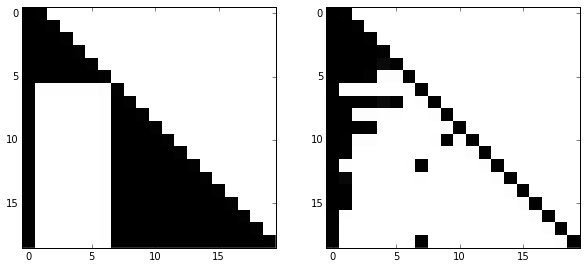

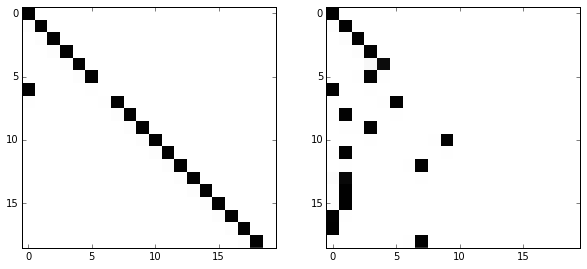

    After 20 iterations
        Discriminator Loss                     = -17444.0917969

    Generator_Loss: 18845.4355469
501
    After 20 iterations
        Discriminator Loss                     = -11907.9716797

    Generator_Loss: 14087.9023438
502
    After 20 iterations
        Discriminator Loss                     = -15342.4179688

    Generator_Loss: 22203.8828125
503
    After 20 iterations
        Discriminator Loss                     = -11049.4462891

    Generator_Loss: 19278.2148438
504
    After 20 iterations
        Discriminator Loss                     = -19758.0117188

    Generator_Loss: 24179.8378906
505
    After 20 iterations
        Discriminator Loss                     = -17139.7402344

    Generator_Loss: 21820.7109375
506
    After 20 iterations
        Discriminator Loss                     = -14556.9453125

    Generator_Loss: 17279.6132812
507
    After 20 iterations
        Discriminator Loss                     = -18071.4609375

    Generator_Loss: 13

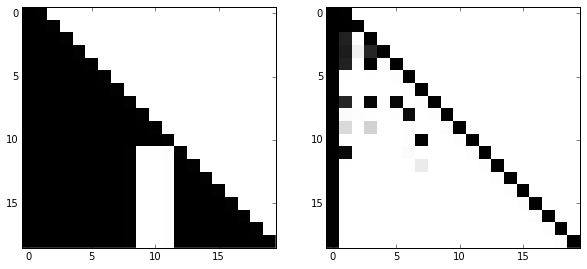

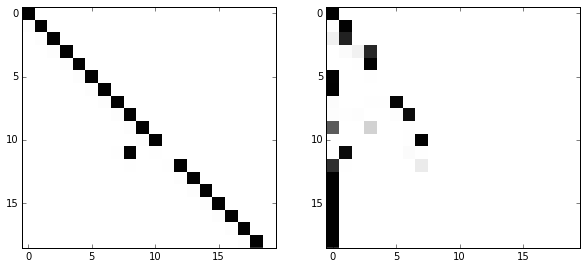

    After 20 iterations
        Discriminator Loss                     = -19659.2792969

    Generator_Loss: 20449.6757812
526
    After 20 iterations
        Discriminator Loss                     = -17518.7871094

    Generator_Loss: 20982.390625
527
    After 20 iterations
        Discriminator Loss                     = -20347.1816406

    Generator_Loss: 16523.4414062
528
    After 20 iterations
        Discriminator Loss                     = -19353.5136719

    Generator_Loss: 14938.2568359
529
    After 20 iterations
        Discriminator Loss                     = -17659.8261719

    Generator_Loss: 14603.7626953
530
    After 20 iterations
        Discriminator Loss                     = -16134.0195312

    Generator_Loss: 22733.1816406
531
    After 20 iterations
        Discriminator Loss                     = -17173.0117188

    Generator_Loss: 22979.7832031
532
    After 20 iterations
        Discriminator Loss                     = -13222.9287109

    Generator_Loss: 212

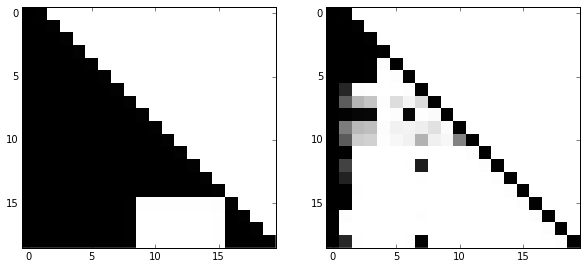

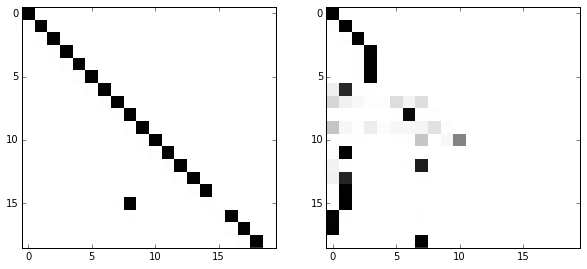

    After 20 iterations
        Discriminator Loss                     = -15564.7880859

    Generator_Loss: 20953.9003906
551
    After 20 iterations
        Discriminator Loss                     = -18028.5898438

    Generator_Loss: 22349.1816406
552
    After 20 iterations
        Discriminator Loss                     = -17897.2148438

    Generator_Loss: 25235.3925781
553
    After 20 iterations
        Discriminator Loss                     = -15148.2246094

    Generator_Loss: 26392.2773438
554
    After 20 iterations
        Discriminator Loss                     = -17224.4335938

    Generator_Loss: 19965.0058594
555
    After 20 iterations
        Discriminator Loss                     = -17081.8691406

    Generator_Loss: 25414.1152344
556
    After 20 iterations
        Discriminator Loss                     = -17174.4042969

    Generator_Loss: 21126.890625
557
    After 20 iterations
        Discriminator Loss                     = -15489.2285156

    Generator_Loss: 150

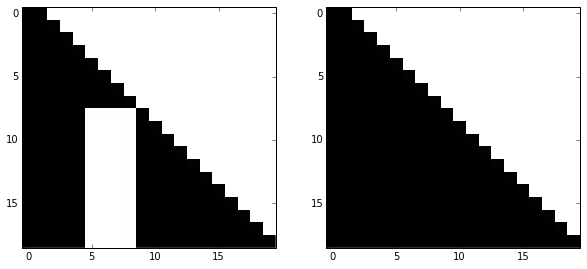

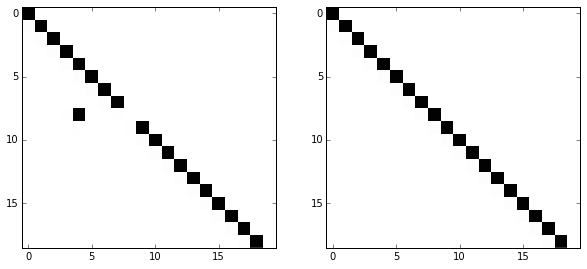

    After 20 iterations
        Discriminator Loss                     = -18180.3710938

    Generator_Loss: 27121.3515625
576
    After 20 iterations
        Discriminator Loss                     = -17567.5117188

    Generator_Loss: 9311.52539062
577
    After 20 iterations
        Discriminator Loss                     = -14435.5683594

    Generator_Loss: 24373.4511719
578
    After 20 iterations
        Discriminator Loss                     = -18733.8417969

    Generator_Loss: 20084.6933594
579
    After 20 iterations
        Discriminator Loss                     = -19143.4355469

    Generator_Loss: 24467.328125
580
    After 20 iterations
        Discriminator Loss                     = -17666.8613281

    Generator_Loss: 22157.5878906
581
    After 20 iterations
        Discriminator Loss                     = -20138.8652344

    Generator_Loss: 19917.3125
582
    After 20 iterations
        Discriminator Loss                     = -16447.2363281

    Generator_Loss: 20184.

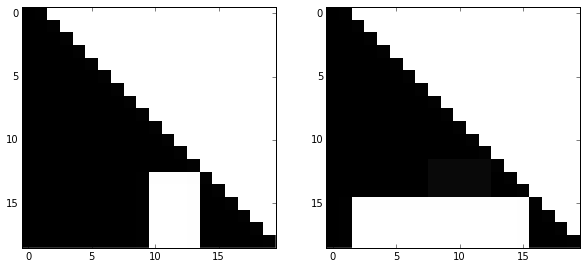

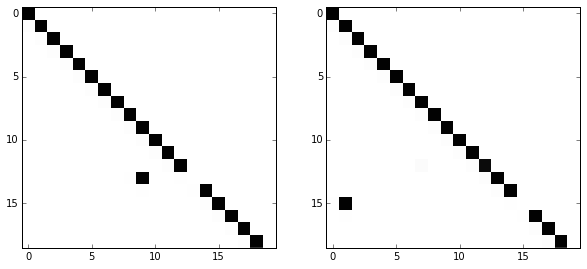

    After 20 iterations
        Discriminator Loss                     = -16383.0585938

    Generator_Loss: 20614.5195312
601
    After 20 iterations
        Discriminator Loss                     = -18620.1835938

    Generator_Loss: 21438.6464844
602
    After 20 iterations
        Discriminator Loss                     = -17211.3691406

    Generator_Loss: 23137.4140625
603
    After 20 iterations
        Discriminator Loss                     = -22053.1699219

    Generator_Loss: 22771.5234375
604
    After 20 iterations
        Discriminator Loss                     = -20168.4121094

    Generator_Loss: 24535.390625
605
    After 20 iterations
        Discriminator Loss                     = -14412.4082031

    Generator_Loss: 23156.4492188
606
    After 20 iterations
        Discriminator Loss                     = -21984.2832031

    Generator_Loss: 23044.0957031
607
    After 20 iterations
        Discriminator Loss                     = -19572.140625

    Generator_Loss: 2287

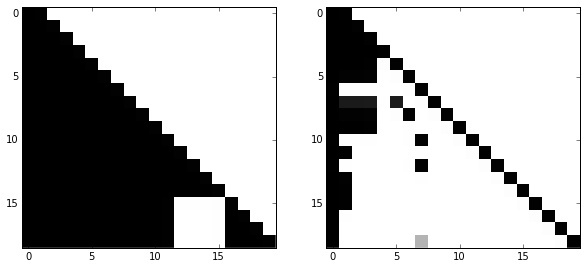

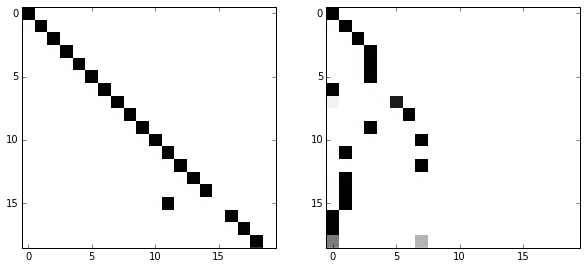

    After 20 iterations
        Discriminator Loss                     = -21626.234375

    Generator_Loss: 23816.375
626
    After 20 iterations
        Discriminator Loss                     = -19648.4765625

    Generator_Loss: 21294.2050781
627
    After 20 iterations
        Discriminator Loss                     = -23789.9335938

    Generator_Loss: 28179.859375
628
    After 20 iterations
        Discriminator Loss                     = -18815.5957031

    Generator_Loss: 8379.63476562
629
    After 20 iterations
        Discriminator Loss                     = -13428.2021484

    Generator_Loss: 8597.19824219
630
    After 20 iterations
        Discriminator Loss                     = -14273.5087891

    Generator_Loss: 30144.6855469
631
    After 20 iterations
        Discriminator Loss                     = -10876.7460938

    Generator_Loss: -3899.28393555
632
    After 20 iterations
        Discriminator Loss                     = -13495.2021484

    Generator_Loss: -15568.

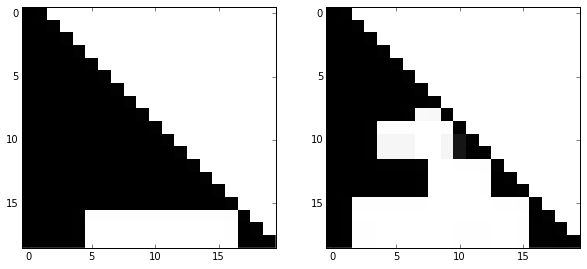

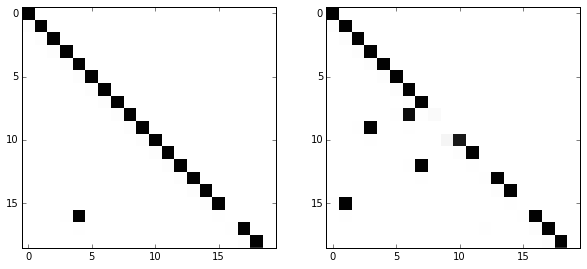

    After 20 iterations
        Discriminator Loss                     = -22454.1230469

    Generator_Loss: 23339.2050781
651
    After 20 iterations
        Discriminator Loss                     = -21750.6933594

    Generator_Loss: 21166.1992188
652
    After 20 iterations
        Discriminator Loss                     = -19049.71875

    Generator_Loss: 22079.3027344
653
    After 20 iterations
        Discriminator Loss                     = -19466.2226562

    Generator_Loss: 27156.7226562
654
    After 20 iterations
        Discriminator Loss                     = -17596.5957031

    Generator_Loss: 25968.421875
655
    After 20 iterations
        Discriminator Loss                     = -20390.2773438

    Generator_Loss: 29600.5546875
656
    After 20 iterations
        Discriminator Loss                     = -19784.2207031

    Generator_Loss: 23655.8476562
657
    After 20 iterations
        Discriminator Loss                     = -20365.6328125

    Generator_Loss: 24180

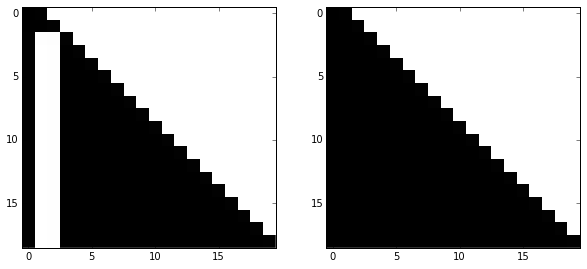

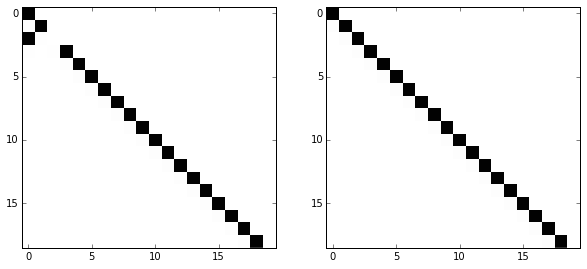

    After 20 iterations
        Discriminator Loss                     = -21931.3671875

    Generator_Loss: 33484.4492188
676
    After 20 iterations
        Discriminator Loss                     = -21740.3945312

    Generator_Loss: 24162.5976562
677
    After 20 iterations
        Discriminator Loss                     = -20265.3046875

    Generator_Loss: 22304.9863281
678
    After 20 iterations
        Discriminator Loss                     = -21704.8125

    Generator_Loss: 21313.2695312
679
    After 20 iterations
        Discriminator Loss                     = -16205.9306641

    Generator_Loss: 22530.5097656
680
    After 20 iterations
        Discriminator Loss                     = -22352.4472656

    Generator_Loss: 20889.8808594
681
    After 20 iterations
        Discriminator Loss                     = -21520.1621094

    Generator_Loss: 31061.4941406
682
    After 20 iterations
        Discriminator Loss                     = -19539.2148438

    Generator_Loss: 20005

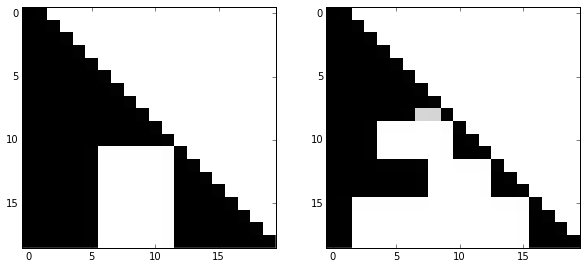

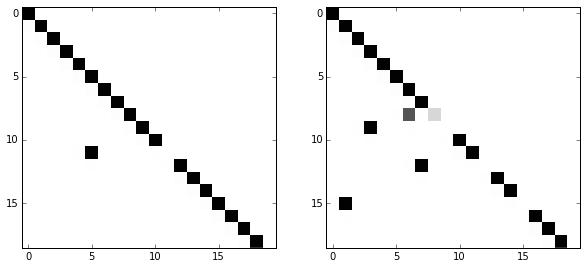

    After 20 iterations
        Discriminator Loss                     = -18147.28125

    Generator_Loss: 24736.4921875
701
    After 20 iterations
        Discriminator Loss                     = -19055.3886719

    Generator_Loss: 28152.9707031
702
    After 20 iterations
        Discriminator Loss                     = -20639.5742188

    Generator_Loss: 24027.4589844
703
    After 20 iterations
        Discriminator Loss                     = -23566.1679688

    Generator_Loss: 24926.6035156
704
    After 20 iterations
        Discriminator Loss                     = -22433.5058594

    Generator_Loss: 18238.7578125
705
    After 20 iterations
        Discriminator Loss                     = -20083.890625

    Generator_Loss: 19888.4375
706
    After 20 iterations
        Discriminator Loss                     = -20712.5351562

    Generator_Loss: 24514.078125
707
    After 20 iterations
        Discriminator Loss                     = -23042.8105469

    Generator_Loss: 25540.919

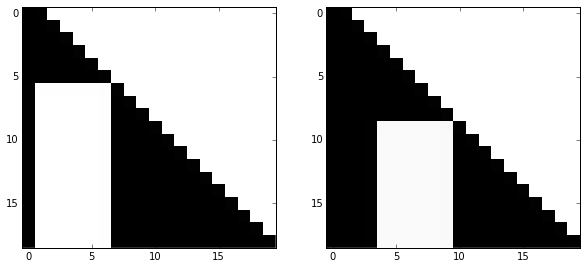

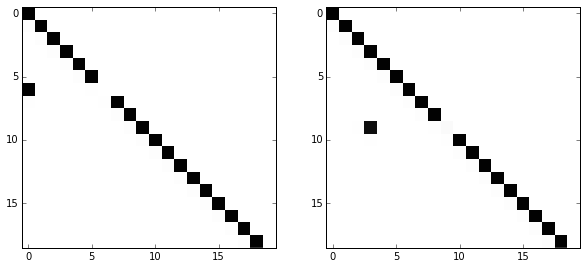

    After 20 iterations
        Discriminator Loss                     = -21358.0585938

    Generator_Loss: 26339.4921875
726
    After 20 iterations
        Discriminator Loss                     = -19574.2832031

    Generator_Loss: 23329.6230469
727
    After 20 iterations
        Discriminator Loss                     = -20412.5019531

    Generator_Loss: 23342.9003906
728
    After 20 iterations
        Discriminator Loss                     = -19358.3691406

    Generator_Loss: 24985.1621094
729
    After 20 iterations
        Discriminator Loss                     = -20888.8105469

    Generator_Loss: 25518.0039062
730
    After 20 iterations
        Discriminator Loss                     = -18289.6660156

    Generator_Loss: 15801.5429688
731
    After 20 iterations
        Discriminator Loss                     = -22947.7617188

    Generator_Loss: 24143.6699219
732
    After 20 iterations
        Discriminator Loss                     = -19062.7460938

    Generator_Loss: 17

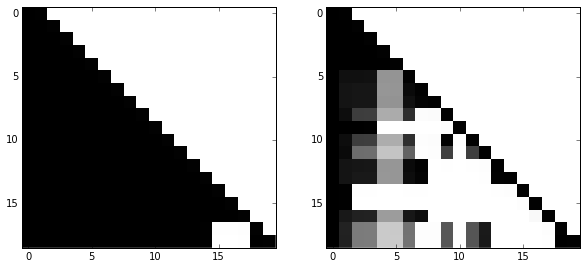

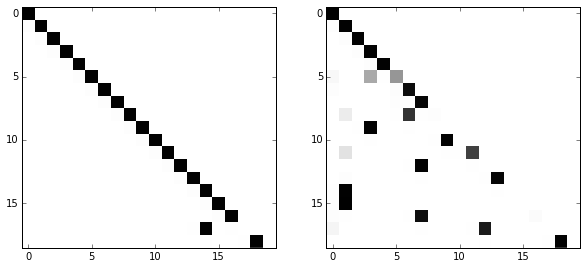

    After 20 iterations
        Discriminator Loss                     = -23220.8457031

    Generator_Loss: 27116.9921875
751
    After 20 iterations
        Discriminator Loss                     = -20590.7128906

    Generator_Loss: 27756.6308594
752
    After 20 iterations
        Discriminator Loss                     = -21671.9316406

    Generator_Loss: 26968.9160156
753
    After 20 iterations
        Discriminator Loss                     = -24126.3886719

    Generator_Loss: 19295.4921875
754
    After 20 iterations
        Discriminator Loss                     = -16985.6445312

    Generator_Loss: 24263.5175781
755
    After 20 iterations
        Discriminator Loss                     = -19380.1484375

    Generator_Loss: 30277.4726562
756
    After 20 iterations
        Discriminator Loss                     = -22998.6484375

    Generator_Loss: 27054.6914062
757
    After 20 iterations
        Discriminator Loss                     = -17102.8613281

    Generator_Loss: 27

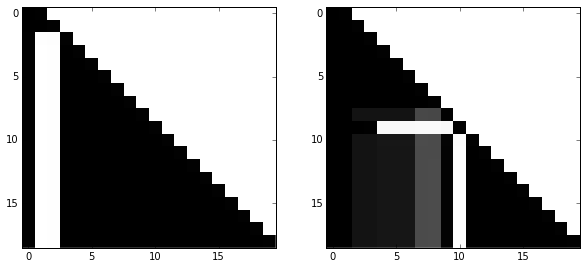

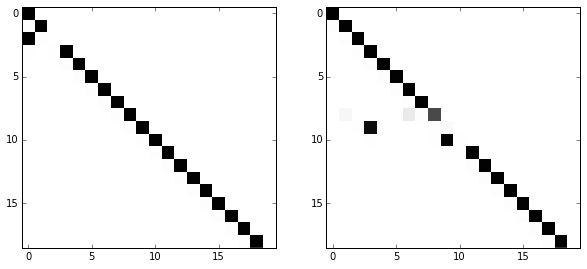

    After 20 iterations
        Discriminator Loss                     = -13785.7119141

    Generator_Loss: 24411.4179688
776
    After 20 iterations
        Discriminator Loss                     = -19918.484375

    Generator_Loss: 29577.7871094
777
    After 20 iterations
        Discriminator Loss                     = -17838.9746094

    Generator_Loss: 23461.2148438
778
    After 20 iterations
        Discriminator Loss                     = -20408.0136719

    Generator_Loss: 24834.9882812
779
    After 20 iterations
        Discriminator Loss                     = -22956.2421875

    Generator_Loss: 24203.8808594
780
    After 20 iterations
        Discriminator Loss                     = -12265.3212891

    Generator_Loss: 23043.8476562
781
    After 20 iterations
        Discriminator Loss                     = -15451.1650391

    Generator_Loss: 24223.8398438
782
    After 20 iterations
        Discriminator Loss                     = -22619.2285156

    Generator_Loss: 236

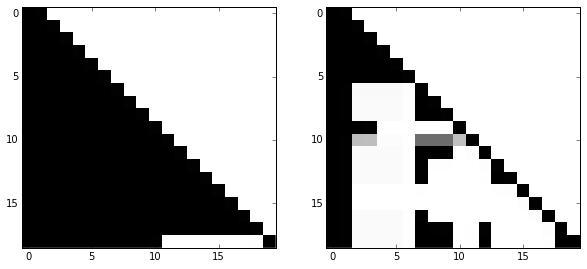

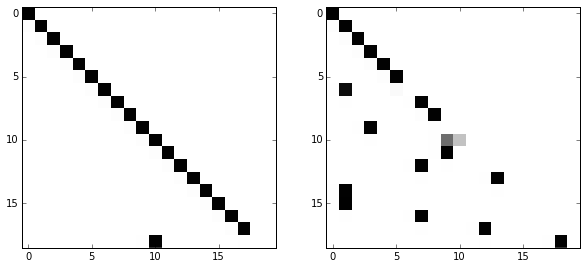

    After 20 iterations
        Discriminator Loss                     = -15942.8759766

    Generator_Loss: 21546.7636719
801
    After 20 iterations
        Discriminator Loss                     = -18406.0703125

    Generator_Loss: 26769.8222656
802
    After 20 iterations
        Discriminator Loss                     = -24344.2109375

    Generator_Loss: 20401.1054688
803
    After 20 iterations
        Discriminator Loss                     = -20712.6445312

    Generator_Loss: 15836.0234375
804
    After 20 iterations
        Discriminator Loss                     = -21584.6425781

    Generator_Loss: 28040.1542969
805
    After 20 iterations
        Discriminator Loss                     = -11980.4980469

    Generator_Loss: 23199.7734375
806
    After 20 iterations
        Discriminator Loss                     = -19127.6152344

    Generator_Loss: 20244.7578125
807
    After 20 iterations
        Discriminator Loss                     = -23279.9160156

    Generator_Loss: 29

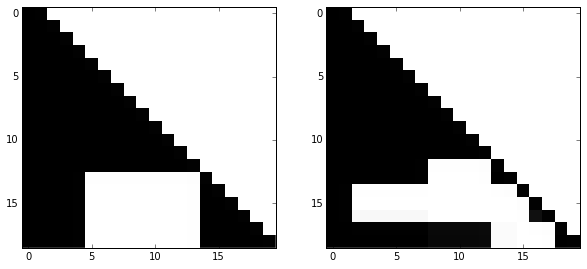

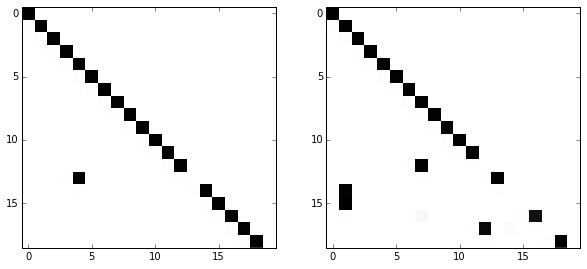

    After 20 iterations
        Discriminator Loss                     = -21012.2617188

    Generator_Loss: 26234.7734375
826
    After 20 iterations
        Discriminator Loss                     = -16455.0722656

    Generator_Loss: 27439.8242188
827
    After 20 iterations
        Discriminator Loss                     = -18755.515625

    Generator_Loss: 21755.4667969
828
    After 20 iterations
        Discriminator Loss                     = -17804.9667969

    Generator_Loss: 24264.3710938
829
    After 20 iterations
        Discriminator Loss                     = -17947.3417969

    Generator_Loss: 27538.8066406
830
    After 20 iterations
        Discriminator Loss                     = -19871.9570312

    Generator_Loss: 26171.7246094
831
    After 20 iterations
        Discriminator Loss                     = -19704.5605469

    Generator_Loss: 25026.2226562
832
    After 20 iterations
        Discriminator Loss                     = -17992.3398438

    Generator_Loss: 603

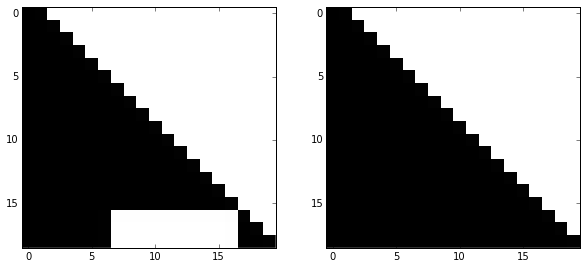

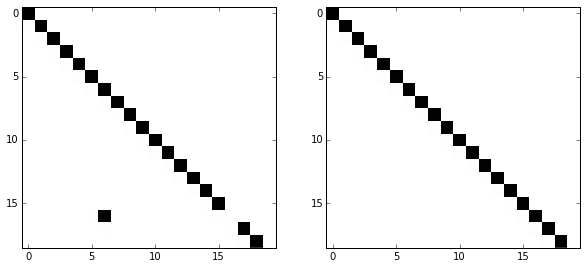

    After 20 iterations
        Discriminator Loss                     = -20451.9453125

    Generator_Loss: 35141.8554688
851
    After 20 iterations
        Discriminator Loss                     = -21020.6699219

    Generator_Loss: 25576.0195312
852
    After 20 iterations
        Discriminator Loss                     = -16705.9863281

    Generator_Loss: 29442.6796875
853
    After 20 iterations
        Discriminator Loss                     = -20718.3535156

    Generator_Loss: 31741.3183594
854
    After 20 iterations
        Discriminator Loss                     = -16467.4824219

    Generator_Loss: 23517.9667969
855
    After 20 iterations
        Discriminator Loss                     = -19547.9921875

    Generator_Loss: 29544.6308594
856
    After 20 iterations
        Discriminator Loss                     = -25685.6621094

    Generator_Loss: 28027.6367188
857
    After 20 iterations
        Discriminator Loss                     = -16118.8994141

    Generator_Loss: 30

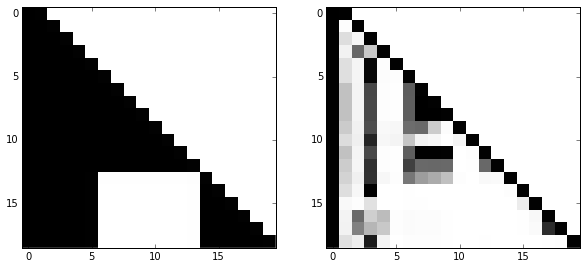

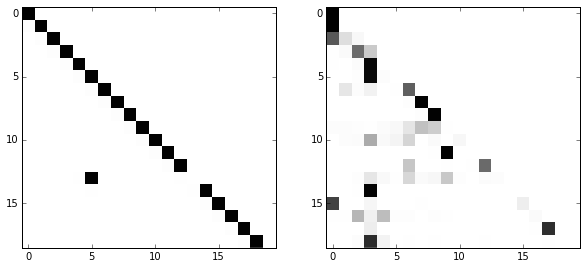

    After 20 iterations
        Discriminator Loss                     = -23115.1582031

    Generator_Loss: 13880.3085938
876
    After 20 iterations
        Discriminator Loss                     = -14497.34375

    Generator_Loss: 29303.9746094
877
    After 20 iterations
        Discriminator Loss                     = -20359.2148438

    Generator_Loss: 27770.0664062
878
    After 20 iterations
        Discriminator Loss                     = -15288.1103516

    Generator_Loss: 20217.3476562
879
    After 20 iterations
        Discriminator Loss                     = -15809.8173828

    Generator_Loss: 13934.4414062
880
    After 20 iterations
        Discriminator Loss                     = -20569.9882812

    Generator_Loss: 14028.265625
881
    After 20 iterations
        Discriminator Loss                     = -18820.7382812

    Generator_Loss: 13759.7050781
882
    After 20 iterations
        Discriminator Loss                     = -16028.4267578

    Generator_Loss: 16982

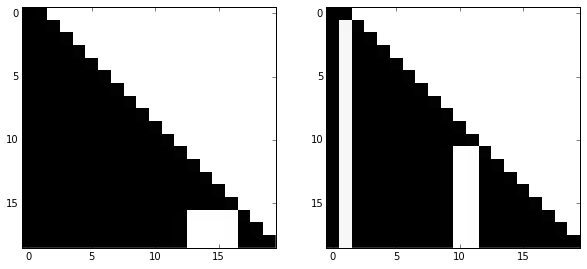

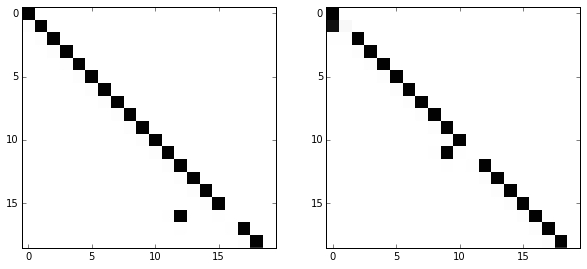

    After 20 iterations
        Discriminator Loss                     = -19918.9238281

    Generator_Loss: 25260.2363281
901
    After 20 iterations
        Discriminator Loss                     = -20946.0195312

    Generator_Loss: 29672.3378906
902
    After 20 iterations
        Discriminator Loss                     = -20267.3789062

    Generator_Loss: 23907.671875
903
    After 20 iterations
        Discriminator Loss                     = -24998.703125

    Generator_Loss: 22906.609375
904
    After 20 iterations
        Discriminator Loss                     = -22544.421875

    Generator_Loss: 27730.2382812
905
    After 20 iterations
        Discriminator Loss                     = -18527.5449219

    Generator_Loss: 30214.7402344
906
    After 20 iterations
        Discriminator Loss                     = -18601.25

    Generator_Loss: 25946.1640625
907
    After 20 iterations
        Discriminator Loss                     = -17698.140625

    Generator_Loss: 27507.5
908


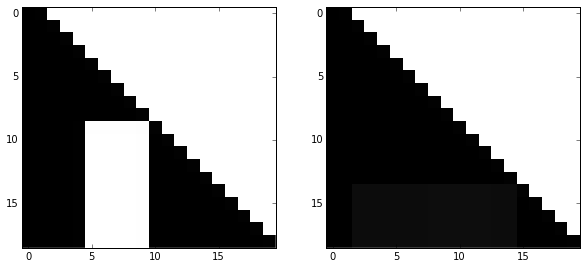

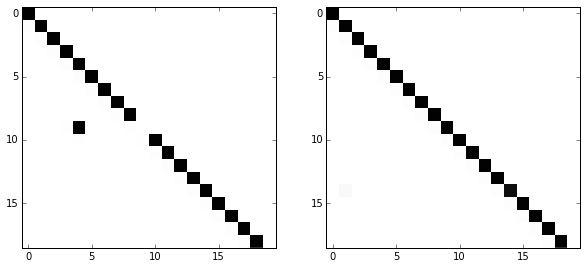

    After 20 iterations
        Discriminator Loss                     = -19358.7421875

    Generator_Loss: 28982.7734375
926
    After 20 iterations
        Discriminator Loss                     = -17725.5800781

    Generator_Loss: 28299.9882812
927
    After 20 iterations
        Discriminator Loss                     = -18060.8789062

    Generator_Loss: 25250.7128906
928
    After 20 iterations
        Discriminator Loss                     = -20592.84375

    Generator_Loss: 18569.1816406
929
    After 20 iterations
        Discriminator Loss                     = -18257.1738281

    Generator_Loss: 25475.9511719
930
    After 20 iterations
        Discriminator Loss                     = -19065.125

    Generator_Loss: 32277.4882812
931
    After 20 iterations
        Discriminator Loss                     = -20351.2539062

    Generator_Loss: 26690.9160156
932
    After 20 iterations
        Discriminator Loss                     = -20219.3613281

    Generator_Loss: 30600.36

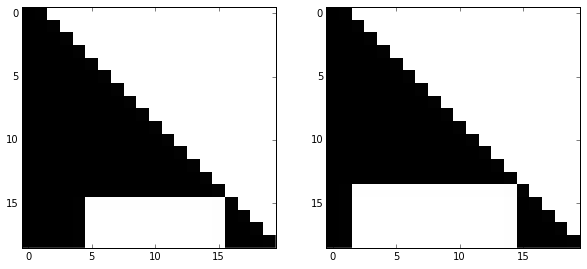

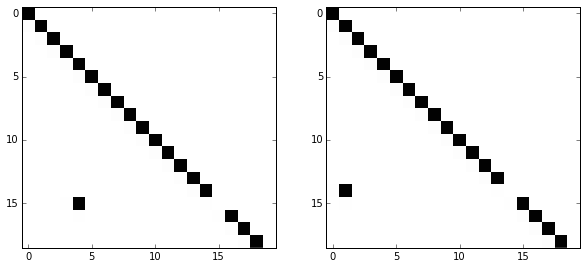

    After 20 iterations
        Discriminator Loss                     = -17754.2285156

    Generator_Loss: 29575.5292969
951
    After 20 iterations
        Discriminator Loss                     = -22999.1523438

    Generator_Loss: 25507.8496094
952
    After 20 iterations
        Discriminator Loss                     = -23586.0820312

    Generator_Loss: 26188.9335938
953
    After 20 iterations
        Discriminator Loss                     = -24932.2304688

    Generator_Loss: 19904.7773438
954
    After 20 iterations
        Discriminator Loss                     = -27062.4628906

    Generator_Loss: 26029.984375
955
    After 20 iterations
        Discriminator Loss                     = -23024.9003906

    Generator_Loss: 20916.984375
956
    After 20 iterations
        Discriminator Loss                     = -26683.8828125

    Generator_Loss: 30261.2734375
957
    After 20 iterations
        Discriminator Loss                     = -18241.3398438

    Generator_Loss: 2708

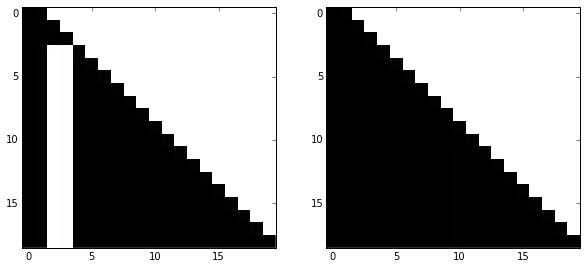

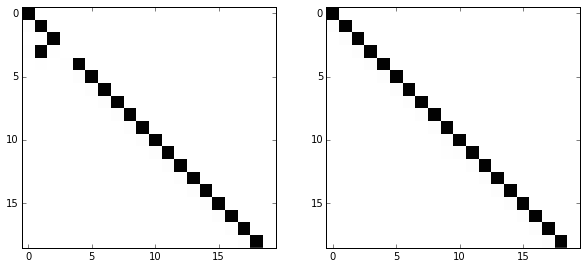

    After 20 iterations
        Discriminator Loss                     = -20082.7304688

    Generator_Loss: 26013.6191406
976
    After 20 iterations
        Discriminator Loss                     = -20223.3085938

    Generator_Loss: 27723.0449219
977
    After 20 iterations
        Discriminator Loss                     = -21343.1132812

    Generator_Loss: 28578.6484375
978
    After 20 iterations
        Discriminator Loss                     = -21456.1015625

    Generator_Loss: 26340.8808594
979
    After 20 iterations
        Discriminator Loss                     = -27455.1308594

    Generator_Loss: 26410.0957031
980
    After 20 iterations
        Discriminator Loss                     = -22336.8984375

    Generator_Loss: 35212.4726562
981
    After 20 iterations
        Discriminator Loss                     = -19707.3242188

    Generator_Loss: 25826.9355469
982
    After 20 iterations
        Discriminator Loss                     = -25709.40625

    Generator_Loss: 3120

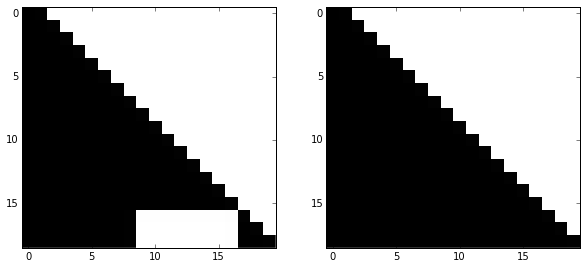

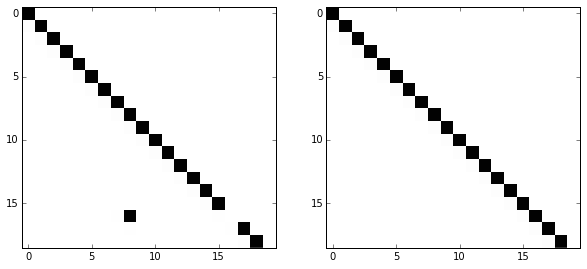

    After 20 iterations
        Discriminator Loss                     = -23319.7480469

    Generator_Loss: 30706.546875
1001
    After 20 iterations
        Discriminator Loss                     = -21450.3457031

    Generator_Loss: 23835.6113281
1002
    After 20 iterations
        Discriminator Loss                     = -24371.8671875

    Generator_Loss: 29163.7734375
1003
    After 20 iterations
        Discriminator Loss                     = -23411.5058594

    Generator_Loss: 28645.5566406
1004
    After 20 iterations
        Discriminator Loss                     = -25587.3867188

    Generator_Loss: 28921.9882812
1005
    After 20 iterations
        Discriminator Loss                     = -25557.71875

    Generator_Loss: 34717.3789062
1006
    After 20 iterations
        Discriminator Loss                     = -18597.2910156

    Generator_Loss: 28682.5683594
1007
    After 20 iterations
        Discriminator Loss                     = -26780.2597656

    Generator_Loss

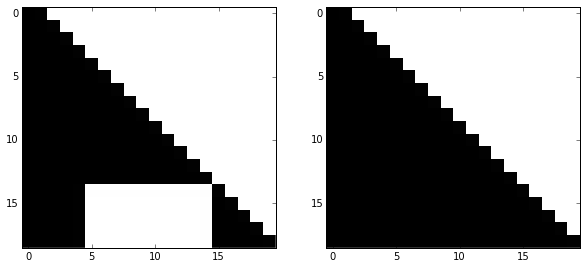

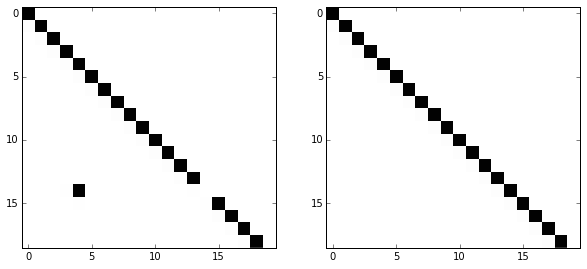

    After 20 iterations
        Discriminator Loss                     = -22413.7734375

    Generator_Loss: 33009.2109375
1026
    After 20 iterations
        Discriminator Loss                     = -24879.1171875

    Generator_Loss: 35234.0898438
1027
    After 20 iterations
        Discriminator Loss                     = -24528.4648438

    Generator_Loss: 29630.9921875
1028
    After 20 iterations
        Discriminator Loss                     = -21156.515625

    Generator_Loss: 27439.734375
1029
    After 20 iterations
        Discriminator Loss                     = -18424.109375

    Generator_Loss: 32794.7304688
1030
    After 20 iterations
        Discriminator Loss                     = -21690.5761719

    Generator_Loss: 33137.1210938
1031
    After 20 iterations
        Discriminator Loss                     = -23000.9394531

    Generator_Loss: 34252.703125
1032
    After 20 iterations
        Discriminator Loss                     = -19278.1367188

    Generator_Loss:

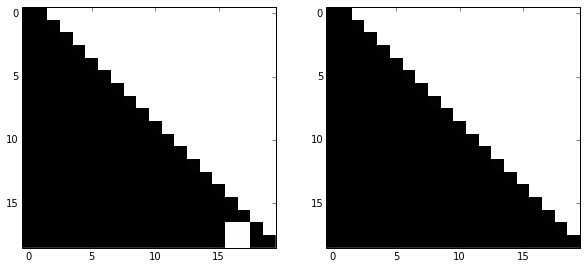

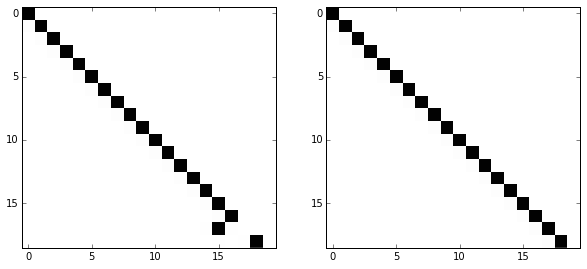

    After 20 iterations
        Discriminator Loss                     = -24155.2089844

    Generator_Loss: 23782.9160156
1051
    After 20 iterations
        Discriminator Loss                     = -24314.1289062

    Generator_Loss: 30770.6210938
1052
    After 20 iterations
        Discriminator Loss                     = -24055.2226562

    Generator_Loss: 30682.0664062
1053
    After 20 iterations
        Discriminator Loss                     = -19497.0

    Generator_Loss: 27724.7832031
1054
    After 20 iterations
        Discriminator Loss                     = -25838.390625

    Generator_Loss: 32448.0722656
1055
    After 20 iterations
        Discriminator Loss                     = -21401.4980469

    Generator_Loss: 27527.7558594
1056
    After 20 iterations
        Discriminator Loss                     = -26751.3554688

    Generator_Loss: 25197.9082031
1057
    After 20 iterations
        Discriminator Loss                     = -28486.671875

    Generator_Loss: 178

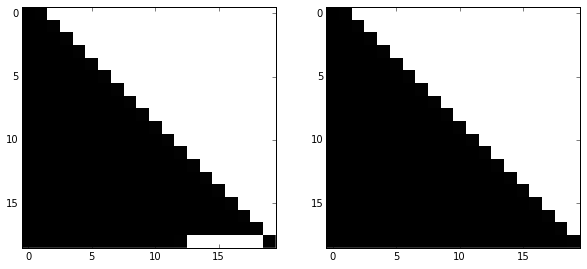

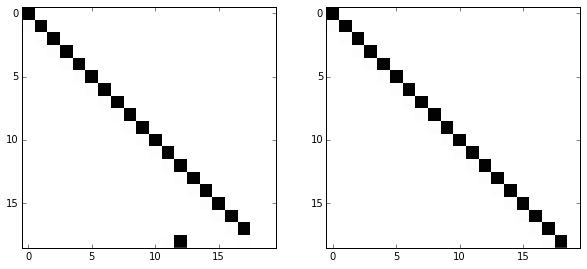

    After 20 iterations
        Discriminator Loss                     = -27146.6171875

    Generator_Loss: 23937.203125
1076
    After 20 iterations
        Discriminator Loss                     = -25781.5546875

    Generator_Loss: 28494.7871094
1077
    After 20 iterations
        Discriminator Loss                     = -20794.3964844

    Generator_Loss: 29630.2675781
1078
    After 20 iterations
        Discriminator Loss                     = -24962.8476562

    Generator_Loss: 29072.9824219
1079
    After 20 iterations
        Discriminator Loss                     = -19918.609375

    Generator_Loss: 30976.4082031
1080
    After 20 iterations
        Discriminator Loss                     = -23463.1074219

    Generator_Loss: 30152.4511719
1081
    After 20 iterations
        Discriminator Loss                     = -19586.6074219

    Generator_Loss: 30170.2949219
1082
    After 20 iterations
        Discriminator Loss                     = -24172.7617188

    Generator_Los

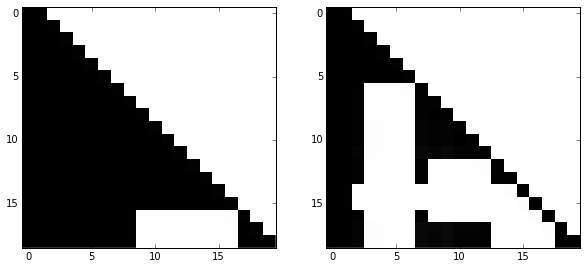

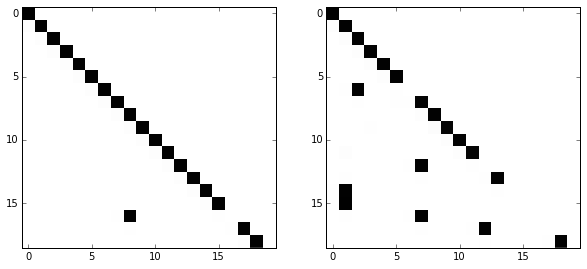

    After 20 iterations
        Discriminator Loss                     = -27783.4667969

    Generator_Loss: 29791.2636719
1101
    After 20 iterations
        Discriminator Loss                     = -21166.5566406

    Generator_Loss: 35561.2578125
1102
    After 20 iterations
        Discriminator Loss                     = -24180.0722656

    Generator_Loss: 27758.4765625
1103
    After 20 iterations
        Discriminator Loss                     = -23619.7011719

    Generator_Loss: 35845.9804688
1104
    After 20 iterations
        Discriminator Loss                     = -24734.5390625

    Generator_Loss: 33016.3125
1105
    After 20 iterations
        Discriminator Loss                     = -21894.2617188

    Generator_Loss: 34990.5585938
1106
    After 20 iterations
        Discriminator Loss                     = -21354.1152344

    Generator_Loss: 26826.3710938
1107
    After 20 iterations
        Discriminator Loss                     = -22118.0292969

    Generator_Loss

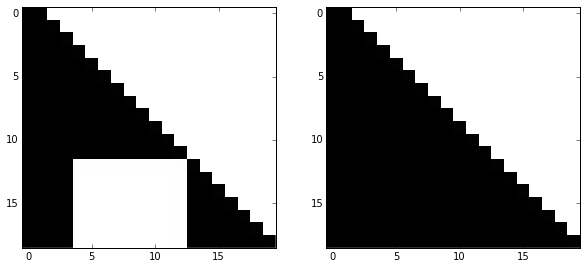

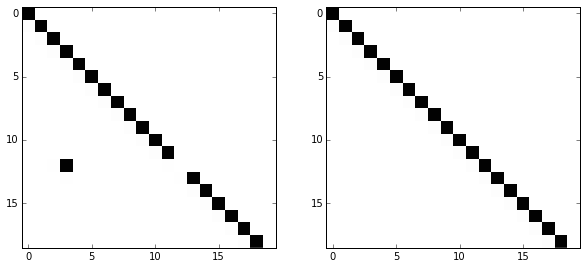

    After 20 iterations
        Discriminator Loss                     = -21971.5

    Generator_Loss: 36625.9335938
1126
    After 20 iterations
        Discriminator Loss                     = -26946.9160156

    Generator_Loss: 27485.6523438
1127
    After 20 iterations
        Discriminator Loss                     = -24940.0351562

    Generator_Loss: 34012.9804688
1128
    After 20 iterations
        Discriminator Loss                     = -26233.7832031

    Generator_Loss: 32441.3789062
1129
    After 20 iterations
        Discriminator Loss                     = -33817.6757812

    Generator_Loss: 31334.7910156
1130
    After 20 iterations
        Discriminator Loss                     = -24086.7304688

    Generator_Loss: 30214.6113281
1131
    After 20 iterations
        Discriminator Loss                     = -24285.9375

    Generator_Loss: 37168.25
1132
    After 20 iterations
        Discriminator Loss                     = -22324.453125

    Generator_Loss: 33796.6445

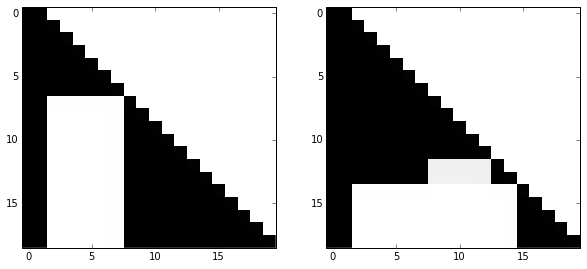

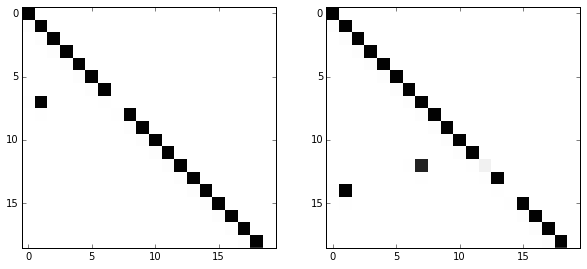

    After 20 iterations
        Discriminator Loss                     = -24505.3144531

    Generator_Loss: 28883.4140625
1151
    After 20 iterations
        Discriminator Loss                     = -25990.9589844

    Generator_Loss: 28583.4003906
1152
    After 20 iterations
        Discriminator Loss                     = -24143.1542969

    Generator_Loss: 27878.3671875
1153
    After 20 iterations
        Discriminator Loss                     = -21507.9121094

    Generator_Loss: 30501.8027344
1154
    After 20 iterations
        Discriminator Loss                     = -24158.7617188

    Generator_Loss: 27332.0507812
1155
    After 20 iterations
        Discriminator Loss                     = -24778.4667969

    Generator_Loss: 29549.8164062
1156
    After 20 iterations
        Discriminator Loss                     = -27331.578125

    Generator_Loss: 31330.7167969
1157
    After 20 iterations
        Discriminator Loss                     = -21044.4492188

    Generator_Lo

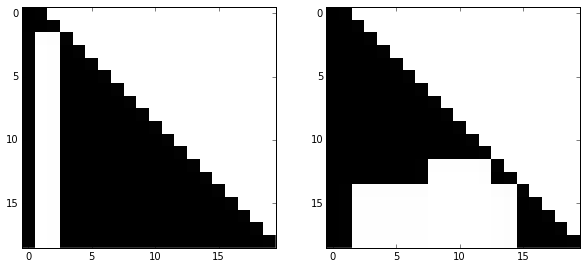

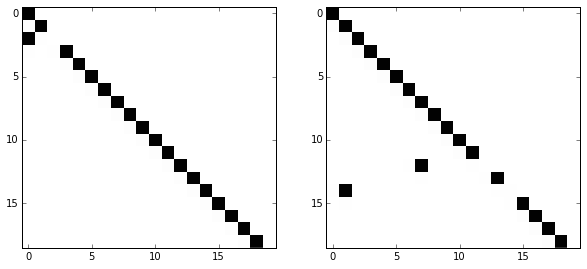

    After 20 iterations
        Discriminator Loss                     = -19197.4179688

    Generator_Loss: 32841.0117188
1176
    After 20 iterations
        Discriminator Loss                     = -21910.6875

    Generator_Loss: 32863.4414062
1177
    After 20 iterations
        Discriminator Loss                     = -23693.9882812

    Generator_Loss: 33064.65625
1178
    After 20 iterations
        Discriminator Loss                     = -23264.328125

    Generator_Loss: 32540.3046875
1179
    After 20 iterations
        Discriminator Loss                     = -19942.8125

    Generator_Loss: 27334.6152344
1180
    After 20 iterations
        Discriminator Loss                     = -24599.2226562

    Generator_Loss: 33444.046875
1181
    After 20 iterations
        Discriminator Loss                     = -26291.2675781

    Generator_Loss: 31629.8027344
1182
    After 20 iterations
        Discriminator Loss                     = -17608.6660156

    Generator_Loss: 33985

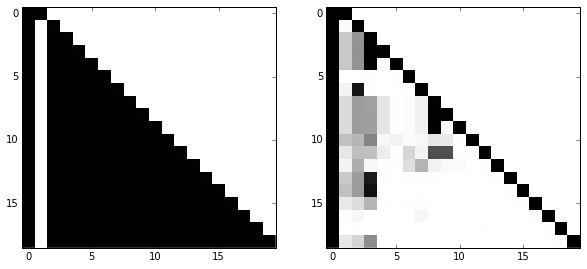

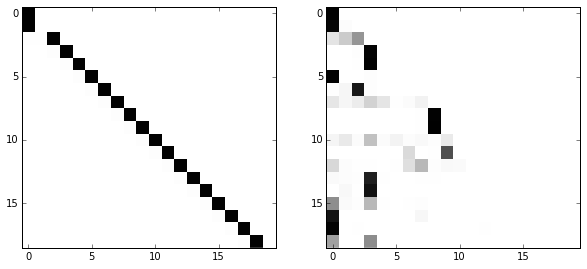

    After 20 iterations
        Discriminator Loss                     = -29730.9257812

    Generator_Loss: 29058.1191406
1201
    After 20 iterations
        Discriminator Loss                     = -25165.0742188

    Generator_Loss: 33063.9804688
1202
    After 20 iterations
        Discriminator Loss                     = -26725.546875

    Generator_Loss: 34007.2617188
1203
    After 20 iterations
        Discriminator Loss                     = -26668.1386719

    Generator_Loss: 32799.5625
1204
    After 20 iterations
        Discriminator Loss                     = -24270.6953125

    Generator_Loss: 38163.375
1205
    After 20 iterations
        Discriminator Loss                     = -15570.1611328

    Generator_Loss: 39092.3164062
1206
    After 20 iterations
        Discriminator Loss                     = -17374.0253906

    Generator_Loss: 33244.609375
1207
    After 20 iterations
        Discriminator Loss                     = -16807.4296875

    Generator_Loss: 3902

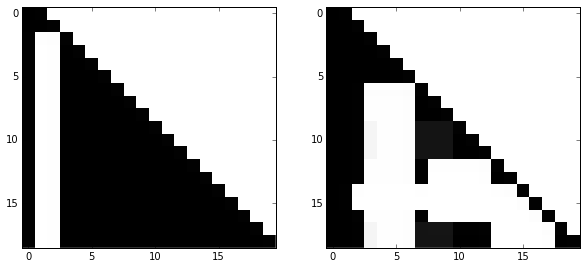

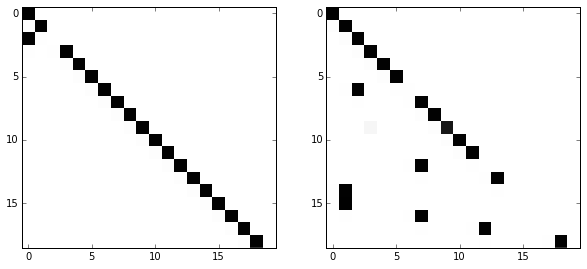

    After 20 iterations
        Discriminator Loss                     = -27897.953125

    Generator_Loss: 32035.5390625
1226
    After 20 iterations
        Discriminator Loss                     = -26559.0898438

    Generator_Loss: 37600.5585938
1227
    After 20 iterations
        Discriminator Loss                     = -16368.0390625

    Generator_Loss: 36861.65625
1228
    After 20 iterations
        Discriminator Loss                     = -25777.234375

    Generator_Loss: 28075.4765625
1229
    After 20 iterations
        Discriminator Loss                     = -19908.5351562

    Generator_Loss: 31985.7617188
1230
    After 20 iterations
        Discriminator Loss                     = -27958.1894531

    Generator_Loss: 31191.7988281
1231
    After 20 iterations
        Discriminator Loss                     = -26168.21875

    Generator_Loss: 25039.7246094
1232
    After 20 iterations
        Discriminator Loss                     = -27418.1015625

    Generator_Loss: 2

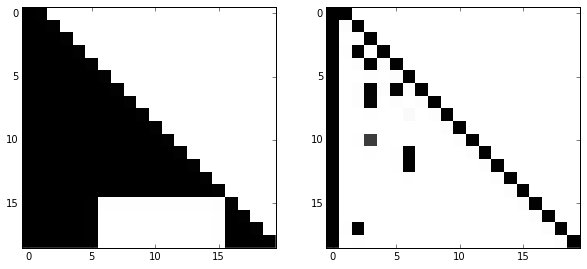

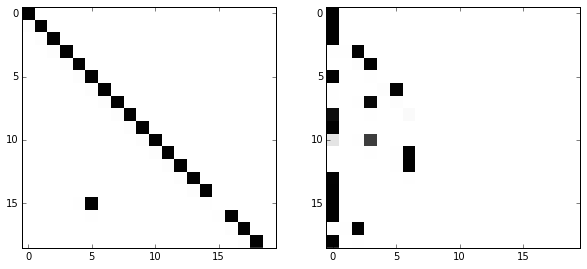

    After 20 iterations
        Discriminator Loss                     = -19511.3925781

    Generator_Loss: 23475.1386719
1251
    After 20 iterations
        Discriminator Loss                     = -27990.796875

    Generator_Loss: 29570.3535156
1252
    After 20 iterations
        Discriminator Loss                     = -22346.0800781

    Generator_Loss: 32036.9257812
1253
    After 20 iterations
        Discriminator Loss                     = -20118.0097656

    Generator_Loss: 27098.4257812
1254
    After 20 iterations
        Discriminator Loss                     = -27163.8671875

    Generator_Loss: 35317.46875
1255
    After 20 iterations
        Discriminator Loss                     = -24759.5820312

    Generator_Loss: 30313.4375
1256
    After 20 iterations
        Discriminator Loss                     = -28198.53125

    Generator_Loss: 34195.3125
1257
    After 20 iterations
        Discriminator Loss                     = -27938.2832031

    Generator_Loss: 29232.

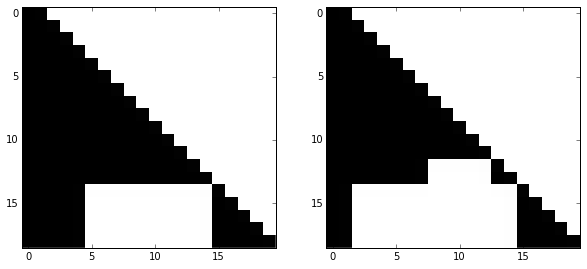

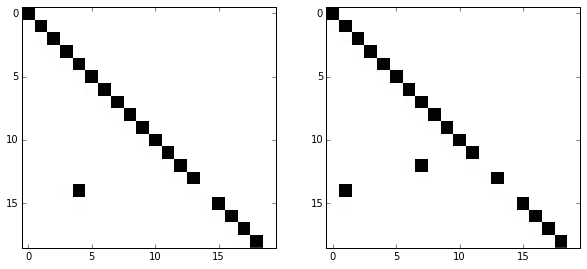

    After 20 iterations
        Discriminator Loss                     = -26288.1796875

    Generator_Loss: 33428.8203125
1276
    After 20 iterations
        Discriminator Loss                     = -22917.3398438

    Generator_Loss: 31123.9785156
1277
    After 20 iterations
        Discriminator Loss                     = -22146.8203125

    Generator_Loss: 32067.8945312
1278
    After 20 iterations
        Discriminator Loss                     = -26121.3984375

    Generator_Loss: 33350.1210938
1279
    After 20 iterations
        Discriminator Loss                     = -24409.75

    Generator_Loss: 32573.8691406
1280
    After 20 iterations
        Discriminator Loss                     = -15123.9882812

    Generator_Loss: 32942.0234375
1281
    After 20 iterations
        Discriminator Loss                     = -26294.9238281

    Generator_Loss: 39153.0273438
1282
    After 20 iterations
        Discriminator Loss                     = -24764.1132812

    Generator_Loss: 

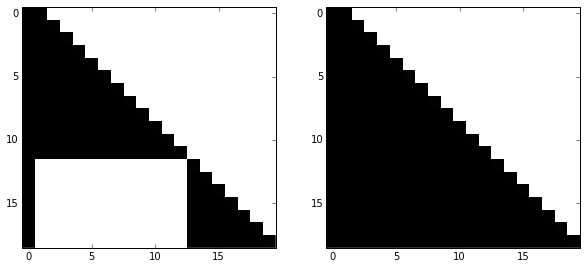

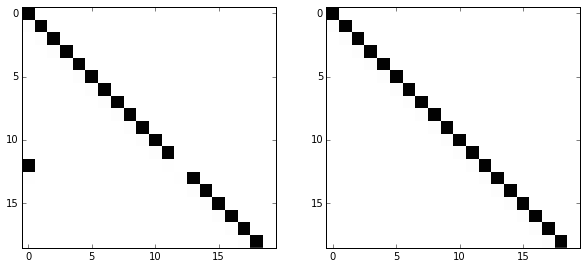

    After 20 iterations
        Discriminator Loss                     = -20971.3398438

    Generator_Loss: 28852.5
1301
    After 20 iterations
        Discriminator Loss                     = -28746.4238281

    Generator_Loss: 36195.734375
1302
    After 20 iterations
        Discriminator Loss                     = -33393.0898438

    Generator_Loss: 30717.1679688
1303
    After 20 iterations
        Discriminator Loss                     = -25396.21875

    Generator_Loss: 37060.859375
1304
    After 20 iterations
        Discriminator Loss                     = -22333.3164062

    Generator_Loss: 31494.1152344
1305
    After 20 iterations
        Discriminator Loss                     = -28629.640625

    Generator_Loss: 37465.6289062
1306
    After 20 iterations
        Discriminator Loss                     = -29272.4609375

    Generator_Loss: 39809.8398438
1307
    After 20 iterations
        Discriminator Loss                     = -30007.1152344

    Generator_Loss: 34862.

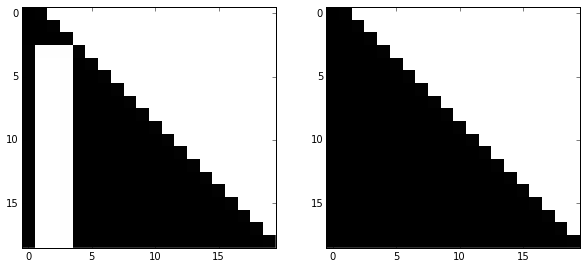

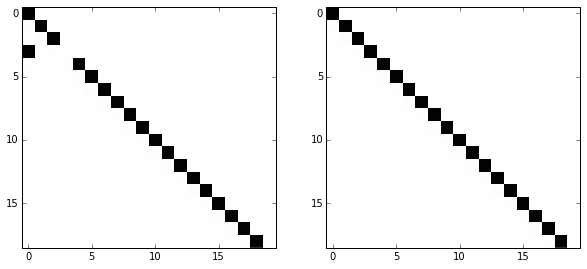

    After 20 iterations
        Discriminator Loss                     = -27981.671875

    Generator_Loss: 28232.4414062
1326
    After 20 iterations
        Discriminator Loss                     = -23042.9375

    Generator_Loss: 36932.3515625
1327
    After 20 iterations
        Discriminator Loss                     = -24624.0527344

    Generator_Loss: 34877.53125
1328
    After 20 iterations
        Discriminator Loss                     = -24201.1621094

    Generator_Loss: 35868.6523438
1329
    After 20 iterations
        Discriminator Loss                     = -33462.8085938

    Generator_Loss: 36121.546875
1330
    After 20 iterations
        Discriminator Loss                     = -20862.6796875

    Generator_Loss: 35210.4648438
1331
    After 20 iterations
        Discriminator Loss                     = -26800.9570312

    Generator_Loss: 34977.0
1332
    After 20 iterations
        Discriminator Loss                     = -23033.2792969

    Generator_Loss: 35612.75

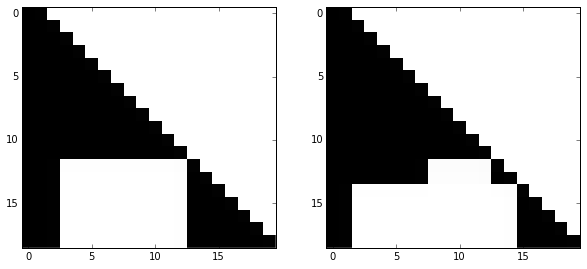

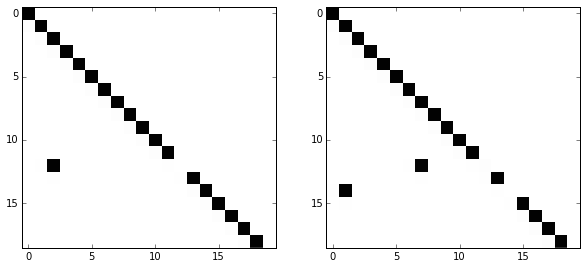

    After 20 iterations
        Discriminator Loss                     = -24190.0488281

    Generator_Loss: 20153.0371094
1351
    After 20 iterations
        Discriminator Loss                     = -28146.2988281

    Generator_Loss: 30974.4257812
1352
    After 20 iterations
        Discriminator Loss                     = -21202.7519531

    Generator_Loss: 32272.8144531
1353
    After 20 iterations
        Discriminator Loss                     = -24186.4609375

    Generator_Loss: 31099.4511719
1354
    After 20 iterations
        Discriminator Loss                     = -20945.5117188

    Generator_Loss: 33916.4648438
1355
    After 20 iterations
        Discriminator Loss                     = -24588.9375

    Generator_Loss: 34127.1601562
1356
    After 20 iterations
        Discriminator Loss                     = -19013.2753906

    Generator_Loss: 32568.2988281
1357
    After 20 iterations
        Discriminator Loss                     = -19169.0253906

    Generator_Loss

KeyboardInterrupt: 

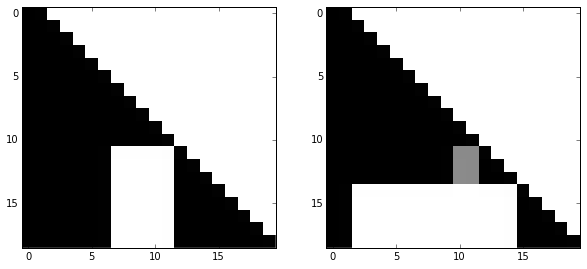

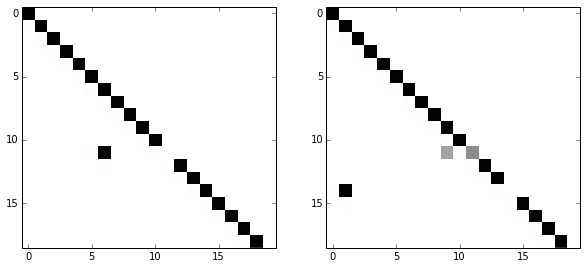

In [4]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      rule=rule,
                      train_one_by_one=train_one_by_one,
                      train_loss=train_loss,
                      verbose=True)